<a href="https://colab.research.google.com/github/baranitharan16/Melanoma-Detection-Assignment/blob/main/Baranitharan_Masilamani_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Importing Skin Cancer Data

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
##drive.mount('/content/gdrive')
data_dir_train = pathlib.Path("gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Creating a dataset

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

In [6]:
## Training dataset
## using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Validation Dataset
## using seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# Listing out all the classes of skin cancer and storing them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Creating a code to visualize one instance of all the nine classes present in the dataset

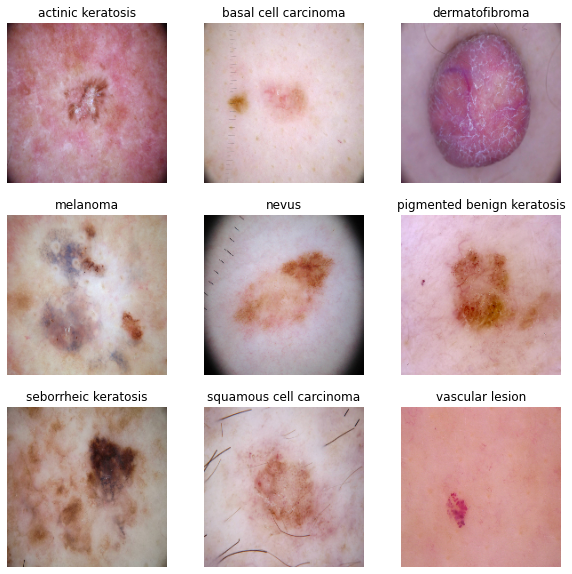

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    unique_set = train_ds.filter(lambda img, lbl: tf.math.equal(lbl[0],i))
    
    for images, labels in unique_set.take(1):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
num_classes = len(class_names)
Model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
Model1.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
Model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 16)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        1

### Train the model

In [14]:
epochs = 20
history = Model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 29s 236ms/step - loss: 9.2440 - accuracy: 0.2824 - val_loss: 2.1711 - val_accuracy: 0.1969
Epoch 2/20
56/56 [==============================] - 9s 164ms/step - loss: 1.6409 - accuracy: 0.4308 - val_loss: 2.1366 - val_accuracy: 0.3065
Epoch 3/20
56/56 [==============================] - 9s 165ms/step - loss: 1.4155 - accuracy: 0.5045 - val_loss: 2.1599 - val_accuracy: 0.2416
Epoch 4/20
56/56 [==============================] - 9s 165ms/step - loss: 1.1192 - accuracy: 0.6133 - val_loss: 1.9231 - val_accuracy: 0.3378
Epoch 5/20
56/56 [==============================] - 9s 165ms/step - loss: 0.7327 - accuracy: 0.7478 - val_loss: 1.8664 - val_accuracy: 0.3758
Epoch 6/20
56/56 [==============================] - 9s 165ms/step - loss: 0.4249 - accuracy: 0.8605 - val_loss: 1.8367 - val_accuracy: 0.3826
Epoch 7/20
56/56 [==============================] - 9s 165ms/step - loss: 0.3221 - accuracy: 0.8979 - val_loss: 1.7687 - val_accuracy: 0.4228
Epoch

### Visualizing training results

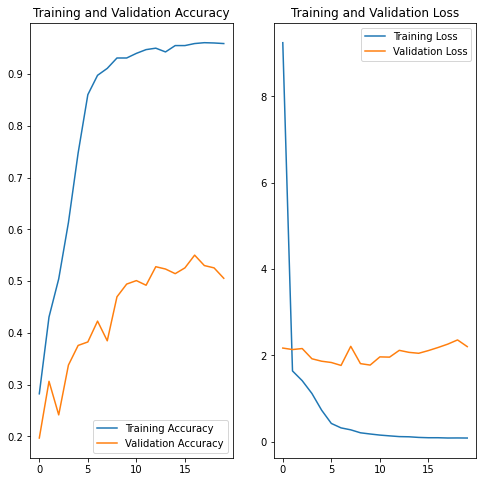

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Insights from the above plot

* In the initial epochs only, the validation and training accuracy increased. After that training accuracy alone increased and validation accuaracy oscillated and never been close to the training accuracy. It is a clear indication of model over fitting. 


### **Creating New Model with Augemntation Starategy**

In [16]:
# After analysing the model fit history for presence of underfit or overfit, choosing an appropriate data augumentation strategy. 


data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical", input_shape=(img_height,
                                  img_width,
                                  3)),
  layers.RandomRotation(0.2),
  layers.RandomZoom(.1)
])


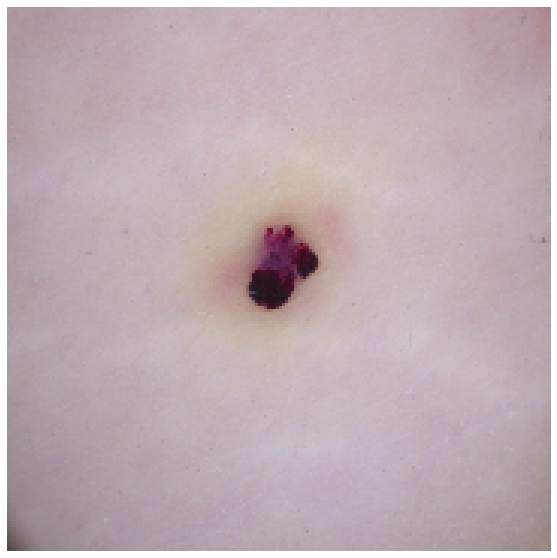

In [17]:
# visualize how the augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  augmented_image = data_augmentation(images)
  ##ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

### Create, compile and train the model


### **Model Creation**

In [18]:
num_classes = len(class_names)
Model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])



### Compiling the model

In [19]:
Model2.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

In [20]:
# View the summary of all layers
Model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 180, 180, 16)     64        
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                  

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history2 = Model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 182ms/step - loss: 10.8367 - accuracy: 0.2310 - val_loss: 2.1829 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 10s 176ms/step - loss: 1.7787 - accuracy: 0.3610 - val_loss: 2.1783 - val_accuracy: 0.2013
Epoch 3/20
56/56 [==============================] - 10s 176ms/step - loss: 1.5769 - accuracy: 0.4537 - val_loss: 2.1446 - val_accuracy: 0.2461
Epoch 4/20
56/56 [==============================] - 10s 176ms/step - loss: 1.5246 - accuracy: 0.4570 - val_loss: 2.1144 - val_accuracy: 0.2215
Epoch 5/20
56/56 [==============================] - 10s 178ms/step - loss: 1.5334 - accuracy: 0.4442 - val_loss: 2.1370 - val_accuracy: 0.2192
Epoch 6/20
56/56 [==============================] - 10s 175ms/step - loss: 1.4977 - accuracy: 0.4643 - val_loss: 2.0773 - val_accuracy: 0.2371
Epoch 7/20
56/56 [==============================] - 10s 176ms/step - loss: 1.4603 - accuracy: 0.4849 - val_loss: 1.9943 - val_accuracy: 0.299

### Visualizing the results

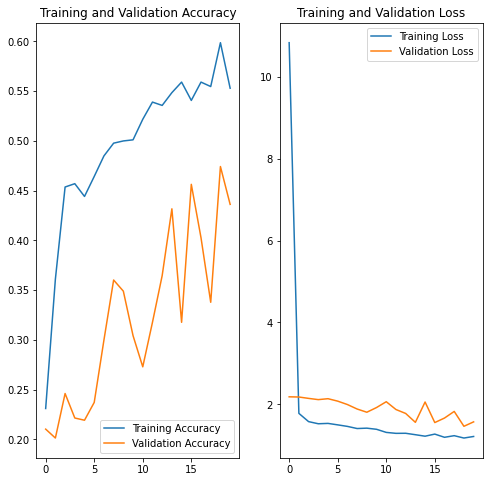

In [22]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Findings from the above Training and Validation Accuracy and Loss plot:**

* This model somewhat better than the Model1 as the training and validation accuracy is slightly closer. But still there was a notable difference between the train and validation accuaracy. Also Training Accuracy keepon increasing as the epochs increases and Validation accuracy is again oscillationg with the notable difference in Training and Validation accuracy.

#### **Find the distribution of classes in the training dataset.**
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

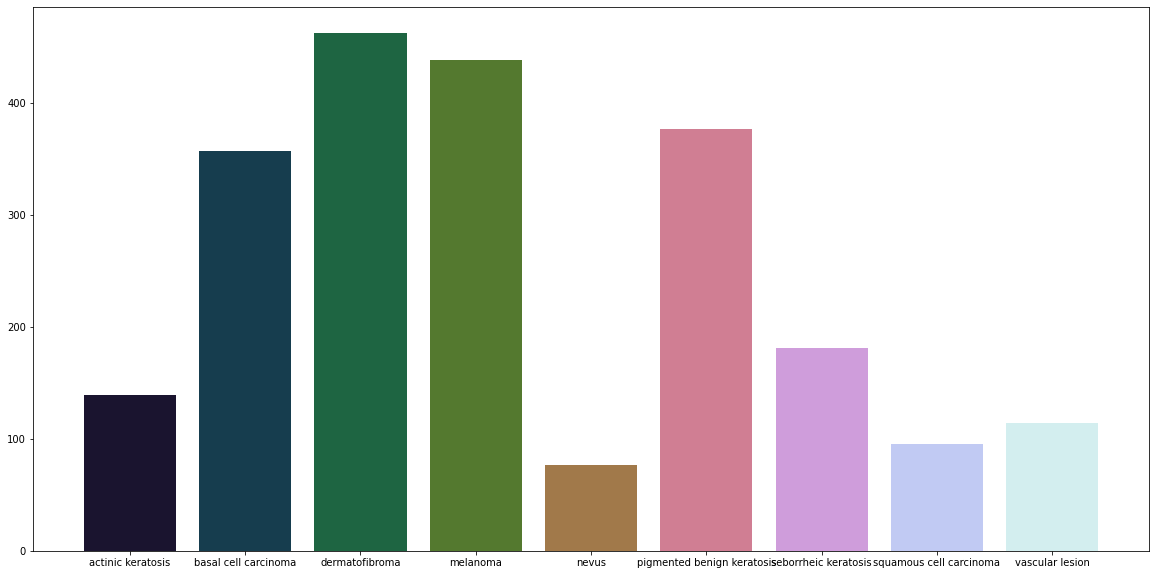

In [23]:
No_images_per_class = []

for i in os.listdir(data_dir_train):
  train_class = os.listdir(os.path.join(data_dir_train,i))
  No_images_per_class.append(len(train_class))

fig = plt.figure(figsize=(20,10))
plt.bar(class_names, No_images_per_class, color = sns.color_palette("cubehelix",len(class_names)))
plt.show()


#### **Findings from the Distribution of Class Visualization:**

#### - seborrheic keratosis has the least number of samples in the train dataset.
#### - pigmented benign keratosis has the most number of samples in the train dataset


#### **Rectifying the class imbalance using Augmentor module**
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

In [25]:
path_to_training_dataset="gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AC0926B90>: 100%|██████████| 500/500 [00:21<00:00, 23.23 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AC10E1D90>: 100%|██████████| 500/500 [00:22<00:00, 22.57 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AC09266D0>: 100%|██████████| 500/500 [00:22<00:00, 22.27 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9A52D35310>: 100%|██████████| 500/500 [01:53<00:00,  4.41 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9AC0926950>: 100%|██████████| 500/500 [01:33<00:00,  5.33 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9AC08F1E50>: 100%|██████████| 500/500 [00:22<00:00, 22.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F9A52D74350>: 100%|██████████| 500/500 [00:50<00:00,  9.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A52D646D0>: 100%|██████████| 500/500 [00:22<00:00, 22.27 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9A52D33790>: 100%|██████████| 500/500 [00:22<00:00, 22.60 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
import glob

In [28]:
original_df = pd.DataFrame()
path_list = [x for x in glob.glob(os.path.join(data_dir_train,'*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

Train    2239
Name: Label, dtype: int64

In [29]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train,'*','output', '*.jpg'))]
path_list_new

['gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032775.jpg_10378580-456d-44b3-b4dc-818e3c9b8f76.jpg',
 'gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033254.jpg_ae5981cd-e162-412e-af3e-93ee4e92d624.jpg',
 'gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033123.jpg_3ad31714-cfa6-406e-a39e-073e7b4a76ad.jpg',
 'gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0027672.jpg_9b27379d-2599-4c21-8f91-96cf066b8ec6.jpg',
 'gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0033349.jpg_33313c33-7fbc-4d82-92e8-dbfc9172a71a.jpg',
 'gdrive/MyDrive/ML/

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [31]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [32]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

Train                         2239
vascular lesion                500
nevus                          500
pigmented benign keratosis     500
melanoma                       500
seborrheic keratosis           500
basal cell carcinoma           500
squamous cell carcinoma        500
dermatofibroma                 500
actinic keratosis              500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Train the model on the data created using Augmentor**

In [34]:
batch_size = 32
img_height = 180
img_width = 180

#### **Create a training dataset**

In [35]:
data_dir_train="gdrive/MyDrive/ML/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Create a validation dataset**

In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Creating the model with Data Augmentation**

In [74]:
num_classes = len(class_names)
Model6 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(num_classes, activation = 'softmax')
])

#### **Compiling the model**

In [75]:
Model6.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

#### **Train the model with Augmentation Data**

In [76]:
epochs = 30
## Your code goes here, use 50 epochs.
history = Model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 100s 251ms/step - loss: 2.1448 - accuracy: 0.3145 - val_loss: 2.1541 - val_accuracy: 0.2131
Epoch 2/30
169/169 [==============================] - 44s 251ms/step - loss: 1.5274 - accuracy: 0.4230 - val_loss: 1.9948 - val_accuracy: 0.3170
Epoch 3/30
169/169 [==============================] - 43s 250ms/step - loss: 1.4452 - accuracy: 0.4529 - val_loss: 1.6219 - val_accuracy: 0.4269
Epoch 4/30
169/169 [==============================] - 44s 251ms/step - loss: 1.3828 - accuracy: 0.4757 - val_loss: 1.7568 - val_accuracy: 0.3794
Epoch 5/30
169/169 [==============================] - 44s 251ms/step - loss: 1.3501 - accuracy: 0.4764 - val_loss: 2.2837 - val_accuracy: 0.3341
Epoch 6/30
169/169 [==============================] - 44s 251ms/step - loss: 1.2873 - accuracy: 0.5096 - val_loss: 1.5264 - val_accuracy: 0.4113
Epoch 7/30
169/169 [==============================] - 44s 251ms/step - loss: 1.2636 - accuracy: 0.5172 - val_loss: 1.2392 - val_a

#### **Visualize the New model results**

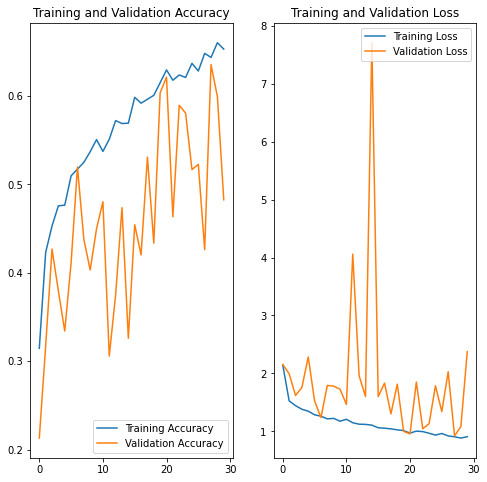

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Analysing the Results of the Model after Data Augmentation**

* After the Data Augmentation, clearly the model performance is improved and the issue of overfitting also resolved as both the train and validation accuracy is increasing with increased epochs.





